In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from itertools import chain

In [3]:
articles_df = pd.read_csv("../articles_data/full_df.csv")

In [49]:
articles_df = articles_df.drop_duplicates()
articles_df

,author_name,database,datestamp,document_type,doi,id,identifier,keywords,language,msc,ref_dois,reviewer_name,subtitle,text,title,year,zbmath_url
0,"Weilert, André",Zbl,0001-01-01T00:00:00Z,journal article,https://doi.org/10.1006/jsco.2000.0422,1570912,1053.11093,nothing,English,"JSON3.Object[{\n ""code"": ""11Y16"",\n ""sch...",NaN,NaN,NaN,zbMATH Open Web Interface contents unavailable...,\((1+i)\)-ary GCD computation in \(\mathbb Z[i...,2000,https://zbmath.org/1570912
1,"Cesari, Giovanni",Zbl,0001-01-01T00:00:00Z,serial article,NaN,1254036,923.68075,package of parallel algorithms; CALYPSO,English,"JSON3.Object[{\n ""code"": ""68W30"",\n ""sch...",NaN,NaN,NaN,Summary: We present a package of parallel algo...,CALYPSO: A computer algebra library for parall...,1997,https://zbmath.org/1254036
2,"Cesaratto, Eda; Clément, Julien; Daireaux, Ben...",Zbl,2009-06-18T11:36:42Z,journal article,https://doi.org/10.1016/j.jsc.2008.04.018,5566485,1179.11049,Euclid algorithm; divide and conquer algorithm...,English,"JSON3.Object[{\n ""code"": ""11Y16"",\n ""sch...",NaN,Jean-Paul Allouche,NaN,zbMATH Open Web Interface contents unavailable...,Regularity of the Euclid algorithm; applicatio...,2009,https://zbmath.org/5566485
3,"Karl, Holger",Zbl,0001-01-01T00:00:00Z,serial article,NaN,1630137,969.68507,clusters of workstations,English,"JSON3.Object[{\n ""code"": ""68N19"",\n ""sch...",NaN,NaN,NaN,Summary: Clusters of workstations are an attra...,Fault-tolerance mechanisms for a parallel prog...,2000,https://zbmath.org/1630137
4,"Tuchman, Allan; Cybenko, George; Jablonowski, ...",Zbl,0001-01-01T00:00:00Z,serial article,NaN,434599,800.68976,remote data visualization,English,"JSON3.Object[{\n ""code"": ""68U05"",\n ""sch...",NaN,NaN,NaN,zbMATH Open Web Interface contents unavailable...,Vista: A system for remote data visualization,1992,https://zbmath.org/434599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325690,Not available; Not available,Zbl,2018-11-14T13:12:28Z,journal article,https://doi.org/10.1080/14697688.2017.1370122,6979450,1400.91534,zbMATH Open Web Interface contents unavailable...,zbMATH Open Web Interface contents unavailable...,"JSON3.Object[{\n ""code"": ""91G10"",\n ""sch...",NaN,NaN,NaN,zbMATH Open Web Interface contents unavailable...,Not available,2017,https://zbmath.org/6979450
325694,Not available; Not available,Zbl,2021-09-03T14:11:10Z,journal article,https://doi.org/10.1080/14697688.2017.1370122,7390935,1471.91529,zbMATH Open Web Interface contents unavailable...,zbMATH Open Web Interface contents unavailable...,"JSON3.Object[{\n ""code"": ""91G15"",\n ""sch...",NaN,NaN,NaN,zbMATH Open Web Interface contents unavailable...,Not available,2018,https://zbmath.org/7390935
325698,"Goel, Anubha; Sharma, Amita",Zbl,2022-05-16T14:04:26Z,journal article,https://doi.org/10.1016/j.physa.2019.123524,7527056,NaN,value-at-risk; mixed value-at-risk; mixed cond...,English,"JSON3.Object[{\n ""code"": ""82-XX"",\n ""sch...",NaN,NaN,NaN,zbMATH Open Web Interface contents unavailable...,Mixed value-at-risk and its numerical investig...,2020,https://zbmath.org/7527056
325713,"Tapiero, Oren J.",Zbl,2014-06-13T15:38:58Z,journal article,https://doi.org/10.3233/AF-13022,6304169,1290.91100,nothing,English,"JSON3.Object[{\n ""code"": ""91B30"",\n ""sch...",NaN,NaN,NaN,Summary: This paper provides a ``non-extensive...,The relationship between risk and incomplete s...,2013,https://zbmath.org/6304169


In [61]:
articles_df.columns

Index(['author_name', 'database', 'datestamp', 'document_type', 'doi', 'id',
       'identifier', 'keywords', 'language', 'msc', 'ref_dois',
       'reviewer_name', 'subtitle', 'text', 'title', 'year', 'zbmath_url'],
      dtype='object')

In [64]:
ref_dois = articles_df["ref_dois"].dropna().tolist()
len(ref_dois)

12760

In [50]:
msc = articles_df["msc"].tolist()

In [51]:
msc1 = msc[0]

In [52]:
msc_json = []
for m in msc: 
    cleaned_string = m.replace('JSON3.Object[', '').rstrip(']')
    json_string = f'[{cleaned_string}]'
    try:
        result = json.loads(json_string)
    except json.JSONDecodeError:
        continue

    msc_json.append(result)

In [53]:
msc[0]

'JSON3.Object[{\n     "code": "11Y16",\n   "scheme": "msc2020",\n     "text": "Number-theoretic algorithms; complexity"\n}, {\n     "code": "68W40",\n   "scheme": "msc2020",\n     "text": "Analysis of algorithms"\n}]'

In [54]:
flattened_data = list(chain.from_iterable(msc_json))
msc_df = pd.DataFrame(flattened_data)


In [55]:
msc_df

,code,scheme,text
0,11Y16,msc2020,Number-theoretic algorithms; complexity
1,68W40,msc2020,Analysis of algorithms
2,68W30,msc2020,Symbolic computation and algebraic computation
3,11Y16,msc2020,Number-theoretic algorithms; complexity
4,37C30,msc2020,Functional analytic techniques in dynamical sy...
...,...,...,...
499586,94A17,msc2020,"Measures of information, entropy"
499587,91B16,msc2020,Utility theory
499588,91G80,msc2020,Financial applications of other theories
499589,91G10,msc2020,Portfolio theory


In [56]:
msc_no_dup = msc_df.drop_duplicates()
msc_no_dup

,code,scheme,text
0,11Y16,msc2020,Number-theoretic algorithms; complexity
1,68W40,msc2020,Analysis of algorithms
2,68W30,msc2020,Symbolic computation and algebraic computation
4,37C30,msc2020,Functional analytic techniques in dynamical sy...
6,68N19,msc2020,"Other programming paradigms (object-oriented, ..."
...,...,...,...
496552,58C06,msc2020,Set-valued and function-space-valued mappings ...
496671,32W30,msc2020,Heat kernels in several complex variables
497479,97I40,msc2020,Differential calculus (educational aspects)
498689,46Lxx,msc2020,Selfadjoint operator algebras (\(C^*\)-algebra...


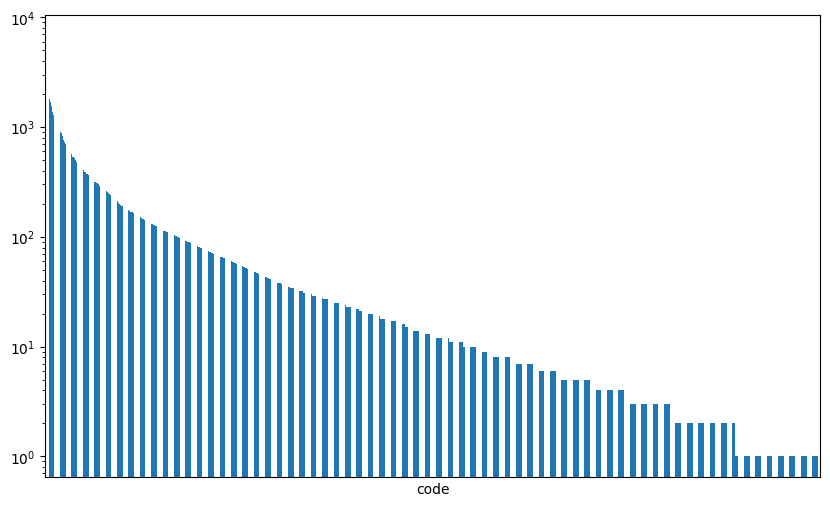

In [57]:
code_counts = msc_df['code'].value_counts()
code_counts.plot(kind='bar', figsize=(10, 6))
plt.yscale('log')
plt.xticks([])  # Remove x-axis ticks
plt.show()

In [41]:
mode = msc_df.mode()
mode

,code,scheme,text
0,68T05,msc2020,Learning and adaptive systems in artificial in...


In [43]:
software_df = pd.read_csv("../data/full_df.csv")
software_df

,articles_count,authors,classification,dependencies,description,homepage,id,keywords,license_terms,name,operating_systems,orms_id,programming_languages,related_software,source_code,standard_articles,zbmath_url
0,106,"Li, X.S., Demmel, J.W.",35;65;68;74;76;05;15;60;78;80;81;82;85;86;90;92,NaN,zbMATH Open Web Interface contents unavailable...,http://crd-legacy.lbl.gov/~xiaoye/SuperLU/,2,orms,NaN,SuperLU-DIST,NaN,265.0,NaN,"Dict{Symbol, Any}(:id => 4013, :name => ""MUMPS...",NaN,"Dict{Symbol, Any}(:year => ""2003"", :authors =>...",https://zbmath.org/software/2
1,1,"Bobkov, V.F.",65;76,NaN,zbMATH Open Web Interface contents unavailable...,http://www.mathnet.ru/php/archive.phtml?wshow=...,3,numerical methods;mesh generation and refineme...,NaN,WHISPAR,NaN,NaN,NaN,NaN,NaN,NaN,https://zbmath.org/software/3
2,9,"R. Ramis, J. Meyer-ter-Vehn, J. Ram&iacute;rez",35;65;76;78;80,NaN,zbMATH Open Web Interface contents unavailable...,http://cpc.cs.qub.ac.uk/summaries/AECV_v1_0.html,4,Inertial Confinement;Radiative Transfer;Lagran...,NaN,MULTI2D,Linux/Unix.,NaN,C.,"Dict{Symbol, Any}(:id => 9029, :name => ""CHIC""...",NaN,"Dict{Symbol, Any}(:year => ""2009"", :authors =>...",https://zbmath.org/software/4
3,127,"Pozrikidis, C.",35;65;74;76;92;37;41;45;49;68;70;78;80;81;82;8...,FDLIB,zbMATH Open Web Interface contents unavailable...,http://dehesa.freeshell.org/BEMLIB/,5,boundary element method;textbook;Green's funct...,NaN,BEMLIB,NaN,NaN,NaN,"Dict{Symbol, Any}(:id => 1160, :name => ""SERBA...",NaN,"Dict{Symbol, Any}(:year => ""2002"", :authors =>...",https://zbmath.org/software/5
4,37,"Engelman, Michael S.",35;65;76;80;92;74;82;86,NaN,zbMATH Open Web Interface contents unavailable...,http://www.sciencedirect.com/science/article/p...,6,steady state or transient;two-dimensional;axi-...,NaN,FIDAP,NaN,NaN,NaN,"Dict{Symbol, Any}(:id => 7692, :name => ""SPARS...",NaN,"Dict{Symbol, Any}(:year => ""1982"", :authors =>...",https://zbmath.org/software/6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46205,2,"Scott, N.S.;Scott, M.P.;Burke, P.G.;Stitt, T.;...",81,NaN,zbMATH Open Web Interface contents unavailable...,http://www.cpc.cs.qub.ac.uk/summaries/AEEA_v1_...,10283,atomic collision processes;electron impact exc...,NaN,2DRMP,NaN,NaN,NaN,"Dict{Symbol, Any}(:id => 10282, :name => ""FARM...",NaN,NaN,https://zbmath.org/software/10283
46206,3,"Bogacz, L.;Burda, Z.;Janke, W.;Waclaw, B.",00;05;15;90,NaN,zbMATH Open Web Interface contents unavailable...,http://www.cpc.cs.qub.ac.uk/summaries/ADWL_v1_...,10284,random graphs;complex networks;Markov process;...,NaN,GraphGen,NaN,NaN,NaN,"Dict{Symbol, Any}(:id => 4082, :name => ""CPLEX...",NaN,NaN,https://zbmath.org/software/10284
46207,2,"Bunge, Carlos F.",65;81;82,NaN,zbMATH Open Web Interface contents unavailable...,http://www.cpc.cs.qub.ac.uk/summaries/ADOP_v1_...,10285,numerical examples;benchmark;eigenproblem;eige...,NaN,HQRII1,NaN,NaN,NaN,"Dict{Symbol, Any}(:id => 545, :name => ""Maple""...",NaN,NaN,https://zbmath.org/software/10285
46208,1,"Daniluk, Andrzej",68;81,NaN,zbMATH Open Web Interface contents unavailable...,http://www.cpc.cs.qub.ac.uk/summaries/ADVL_v2_...,10286,reflection high-energy electron diffraction (R...,NaN,GROWTHgr,NaN,NaN,NaN,"Dict{Symbol, Any}(:id => 10287, :name => ""GROW...",NaN,NaN,https://zbmath.org/software/10286


In [44]:
standard_art = software_df["standard_articles"].to_list()
standard_art

['Dict{Symbol, Any}(:year => "2003", :authors => Any[], :id => 2187846, :title => "zbMATH Open Web Interface contents unavailable due to conflicting licenses.", :source => "zbMATH Open Web Interface contents unavailable due to conflicting licenses.")',
 nan,
 'Dict{Symbol, Any}(:year => "2009", :authors => Any[], :id => 5812948, :title => "zbMATH Open Web Interface contents unavailable due to conflicting licenses.", :source => "zbMATH Open Web Interface contents unavailable due to conflicting licenses.")',
 'Dict{Symbol, Any}(:year => "2002", :authors => Any[], :id => 1852568, :title => "zbMATH Open Web Interface contents unavailable due to conflicting licenses.", :source => "zbMATH Open Web Interface contents unavailable due to conflicting licenses.")',
 'Dict{Symbol, Any}(:year => "1982", :authors => Any[], :id => 3775087, :title => "zbMATH Open Web Interface contents unavailable due to conflicting licenses.", :source => "zbMATH Open Web Interface contents unavailable due to conflict

In [59]:
articles_df[articles_df["id"]==5812948]

,author_name,database,datestamp,document_type,doi,id,identifier,keywords,language,msc,ref_dois,reviewer_name,subtitle,text,title,year,zbmath_url
186926,"Ramis, R.; Meyer-Ter-Vehn, J.; Ramírez, J.",Zbl,2010-11-06T11:25:34Z,journal article,https://doi.org/10.1016/j.cpc.2008.12.033,5812948,1198.76005,\texttt{MULTI2D}; inertial confinement; radiat...,English,"JSON3.Object[{\n ""code"": ""76-04"",\n ""sch...",NaN,NaN,NaN,zbMATH Open Web Interface contents unavailable...,MULTI2D - a computer code for two-dimensional ...,2009,https://zbmath.org/5812948


In [68]:
software_df

,articles_count,authors,classification,dependencies,description,homepage,id,keywords,license_terms,name,operating_systems,orms_id,programming_languages,related_software,source_code,standard_articles,zbmath_url
0,106,"Li, X.S., Demmel, J.W.",35;65;68;74;76;05;15;60;78;80;81;82;85;86;90;92,NaN,zbMATH Open Web Interface contents unavailable...,http://crd-legacy.lbl.gov/~xiaoye/SuperLU/,2,orms,NaN,SuperLU-DIST,NaN,265.0,NaN,"Dict{Symbol, Any}(:id => 4013, :name => ""MUMPS...",NaN,"Dict{Symbol, Any}(:year => ""2003"", :authors =>...",https://zbmath.org/software/2
1,1,"Bobkov, V.F.",65;76,NaN,zbMATH Open Web Interface contents unavailable...,http://www.mathnet.ru/php/archive.phtml?wshow=...,3,numerical methods;mesh generation and refineme...,NaN,WHISPAR,NaN,NaN,NaN,NaN,NaN,NaN,https://zbmath.org/software/3
2,9,"R. Ramis, J. Meyer-ter-Vehn, J. Ram&iacute;rez",35;65;76;78;80,NaN,zbMATH Open Web Interface contents unavailable...,http://cpc.cs.qub.ac.uk/summaries/AECV_v1_0.html,4,Inertial Confinement;Radiative Transfer;Lagran...,NaN,MULTI2D,Linux/Unix.,NaN,C.,"Dict{Symbol, Any}(:id => 9029, :name => ""CHIC""...",NaN,"Dict{Symbol, Any}(:year => ""2009"", :authors =>...",https://zbmath.org/software/4
3,127,"Pozrikidis, C.",35;65;74;76;92;37;41;45;49;68;70;78;80;81;82;8...,FDLIB,zbMATH Open Web Interface contents unavailable...,http://dehesa.freeshell.org/BEMLIB/,5,boundary element method;textbook;Green's funct...,NaN,BEMLIB,NaN,NaN,NaN,"Dict{Symbol, Any}(:id => 1160, :name => ""SERBA...",NaN,"Dict{Symbol, Any}(:year => ""2002"", :authors =>...",https://zbmath.org/software/5
4,37,"Engelman, Michael S.",35;65;76;80;92;74;82;86,NaN,zbMATH Open Web Interface contents unavailable...,http://www.sciencedirect.com/science/article/p...,6,steady state or transient;two-dimensional;axi-...,NaN,FIDAP,NaN,NaN,NaN,"Dict{Symbol, Any}(:id => 7692, :name => ""SPARS...",NaN,"Dict{Symbol, Any}(:year => ""1982"", :authors =>...",https://zbmath.org/software/6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46205,2,"Scott, N.S.;Scott, M.P.;Burke, P.G.;Stitt, T.;...",81,NaN,zbMATH Open Web Interface contents unavailable...,http://www.cpc.cs.qub.ac.uk/summaries/AEEA_v1_...,10283,atomic collision processes;electron impact exc...,NaN,2DRMP,NaN,NaN,NaN,"Dict{Symbol, Any}(:id => 10282, :name => ""FARM...",NaN,NaN,https://zbmath.org/software/10283
46206,3,"Bogacz, L.;Burda, Z.;Janke, W.;Waclaw, B.",00;05;15;90,NaN,zbMATH Open Web Interface contents unavailable...,http://www.cpc.cs.qub.ac.uk/summaries/ADWL_v1_...,10284,random graphs;complex networks;Markov process;...,NaN,GraphGen,NaN,NaN,NaN,"Dict{Symbol, Any}(:id => 4082, :name => ""CPLEX...",NaN,NaN,https://zbmath.org/software/10284
46207,2,"Bunge, Carlos F.",65;81;82,NaN,zbMATH Open Web Interface contents unavailable...,http://www.cpc.cs.qub.ac.uk/summaries/ADOP_v1_...,10285,numerical examples;benchmark;eigenproblem;eige...,NaN,HQRII1,NaN,NaN,NaN,"Dict{Symbol, Any}(:id => 545, :name => ""Maple""...",NaN,NaN,https://zbmath.org/software/10285
46208,1,"Daniluk, Andrzej",68;81,NaN,zbMATH Open Web Interface contents unavailable...,http://www.cpc.cs.qub.ac.uk/summaries/ADVL_v2_...,10286,reflection high-energy electron diffraction (R...,NaN,GROWTHgr,NaN,NaN,NaN,"Dict{Symbol, Any}(:id => 10287, :name => ""GROW...",NaN,NaN,https://zbmath.org/software/10286
